<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 12</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

<p>**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)</p>

<p>**Abgabe**: Montag, 11. Juni, 2016 vor der Vorlesung</p>

<p>**Name**: <font color="red">Bitte geben Sie ihren Namen an</font></p>

<p>**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font></p><br />


<table style="border-style: none; width: 100%; margin-top: 20px; padding: 0px;"
><tr style="border-style: none; margin: 0px; padding: 0px;">
<td style="border-style: none; width: 80%; margin: 0px; padding: 0px; font-size: 20px; font-weight: bold">Integration mit gezinkten Würfeln</td>
<td style="border-style: none; width: 20%; margin: 0px; padding: 0px; text-align: right">(5 Punkte)</td></tr></table>



In dieser Aufgabe wollen wir uns mit der **Integration** von Funktionen mithilfe von **Zufallszahlen** befassen. Die ersten Schritte in diese Richtung haben wir in der Vorlesung besprochen und  wollen nun an einfachen Beispielen die verschiedenen **Sampling-Methoden** untersuchen. 

Beginnen wir mit der folgenden Funktion:
\begin{equation}
f(x) = 2 + 0.1\cdot\cos(x),\quad x\in [-\dfrac{\pi}{2},\; \dfrac{\pi}{2}]
\end{equation}

Sie können sich durch simples plotten leicht davon überzeugen, dass die Funktion relativ flach ist und sich deshalb dazu eignet mit einer gleichförmigen Verteilung integriert zu werden. Führen Sie nun eine Integration dieser Funktion mit bis zu $N=1000$ *gleichförmig verteilten* Zufallszahlen durch und plotten Sie das Ergebnis der Integration gegen die Anzahl gezogender Zufallszahlen $N$. Vergleichen Sie außerdem Ihr Ergebnis mit der numerischen Lösung, die Sie mit der Paket *Cubature* bestimmen können. Ein Beispiel dazu finden Sie in der ersten Inputzelle.

#### Beispiel zur numerischen Integration

```julia
#Pkg.add("Cubature")
using Cubature
f(x) = x^2
(value, err) = hquadrature(f, -2, 2)
```

In [1]:
function integrate(f, max=pi/2; N=1000, points = (rand(N).-1/2).*2max)
    # initialize values
    output = 0
    h = 2max/(N+2)
    
    # integrate
    output += f(-max) + f(max) # only borders
    for x in points
        output += f(x)
    end
    
    # return value
    return output*h
end

# function plotf(f, min, max=-min)
#     # plot f from min to max
#     xs = collect(min:1e-3:max)
#     ys = []
#     for x in xs
#         push!(ys, f(x))
#     end
#     plot(xs, ys)
# end

integrate (generic function with 2 methods)

6.4838775774117705 ist ungefähr 6.4831853071795855.


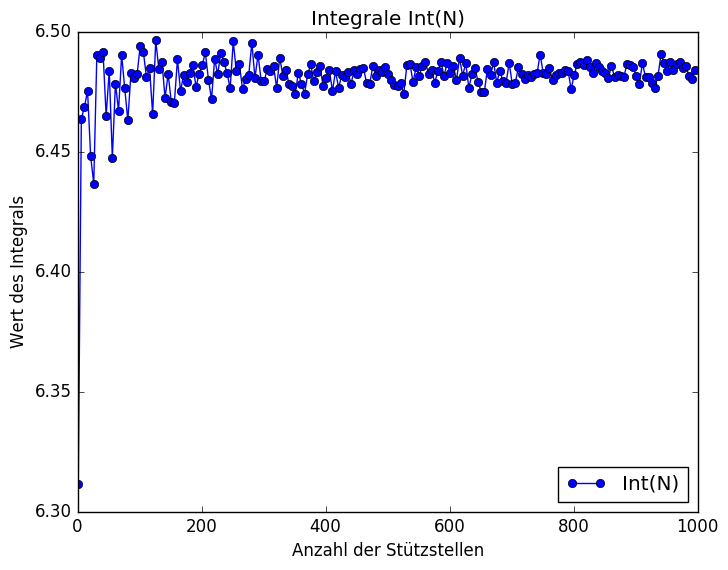

In [2]:
Ns = collect(1:5:1000)
f(x)=2+0.1*cos(x)
Is = [] # save integrals here

for N in Ns
    push!(Is, integrate(f, N=N))
end

using PyPlot
figure()
title("Integrale Int(N)")
xlabel("Anzahl der Stützstellen")
ylabel("Wert des Integrals")
plot(Ns, Is, label="Int(N)", marker="o")
legend(loc=4)

using Cubature
(value, err) = hquadrature(f, -pi/2, pi/2)

println("$(Is[end]) ist ungefähr $value.")

Als nächstes betrachten wir die Funktion
\begin{equation}
g(x) = \cos(x) \cdot \exp{\left(-\dfrac{x^2}{0.01}\right)},\quad x \in (-\infty, \infty)
\end{equation}

Bereits auf den ersten Blick ist klar, dass das Integral dieser Funktion hauptsächlich durch einen kleinen Bereich um 0 bestimmt wird. Deshalb ist es zunächst einmal zulässig den Integrationsbereich auf ein endliches Intervall, zum Beispiel $(-20, 20)$, einzuschränken. Bestimmen Sie das Integral nun wie zuvor mithilfe einer gleichförmig verteilten Zufallsverteilung und plotten Sie das Ergebnis als Funktion der Anzahl gezogener Zufallszahlen. Benutzen Sie dann die Generatoren aus dem Paket *Distributions*, um Zufallszahlen gemäß einer Gaussverteilung mit Mittelwert $\mu$ und Standardabweichung $\sigma$ zu erzeugen. Passen Sie diese Parameter so an, dass die Form der gesampleten Gauß-Kurve möglichst genau der Funktion $g(x)$ entspricht und führen Sie auch diese Integration durch und vergleichen Sie beide Ergebnisse mit der durch *quad* gewonnenen Lösung. 

Beachten Sie, dass Sie mit der Gaußverteilung Zahlen aus $(-\infty, \infty)$ erzeugen. Aufgrund der stark um den Mittelwert zentrierten Form der Verteilung ist der Fehler, den wir gegenüber der Integration mit eingeschränktem Integrationsbereich machen vernachlässigbar. Alternative könnte man nur Zufallszahlen im Bereich $(-20, 20)$ akzeptieren und die Verteilung neu zu skalieren.

#### Beispiel zur Erzeugung normalverteilter Zufallszahlen

```julia
#Pkg.add("Distributions")
using Distributions
mu = 0.5
sigma = 10
random_number_generator = Normal(mu, sigma)
rand(random_number_generator)
```

**Anmerkung: Das Paket *Distributions* ist zurzeit fehlerhaft und konnte daher nicht geladen werden!**

Daher wissen wir auch nicht, wie gut *mu* und *sigma* passen!

0.18230218802420056 ist ungefähr 0.17680282505836542


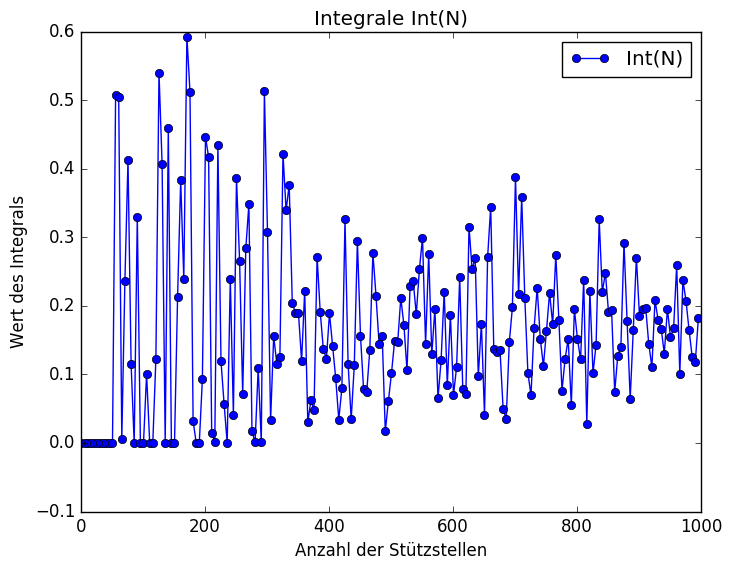

In [3]:
# initialize
g(x) = cos(x).*exp(-100.*x.^2)
Is   = []

srand(3) # seed random here so that there is a nice output
for N in Ns
    push!(Is, integrate(g, 20, N=N))
end

println("$(Is[end]) ist ungefähr $(hquadrature(g, -20, 20)[1])")

using PyPlot
figure()
title("Integrale Int(N)")
xlabel("Anzahl der Stützstellen")
ylabel("Wert des Integrals")
plot(Ns, Is, label="Int(N)", marker="o")
legend()
;

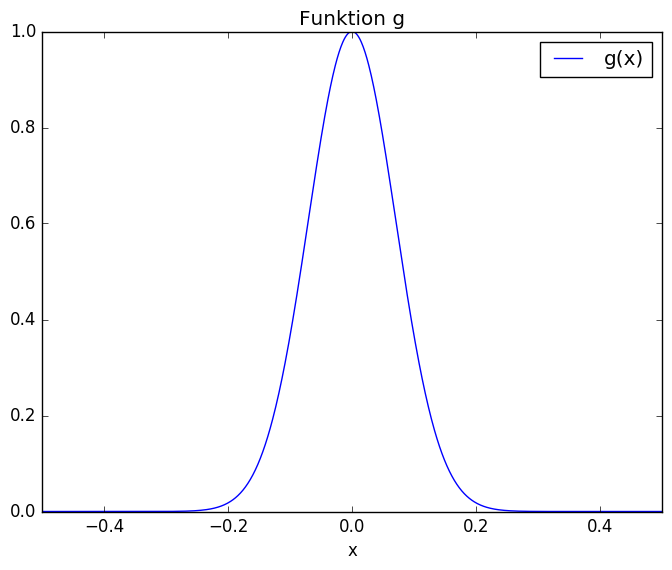

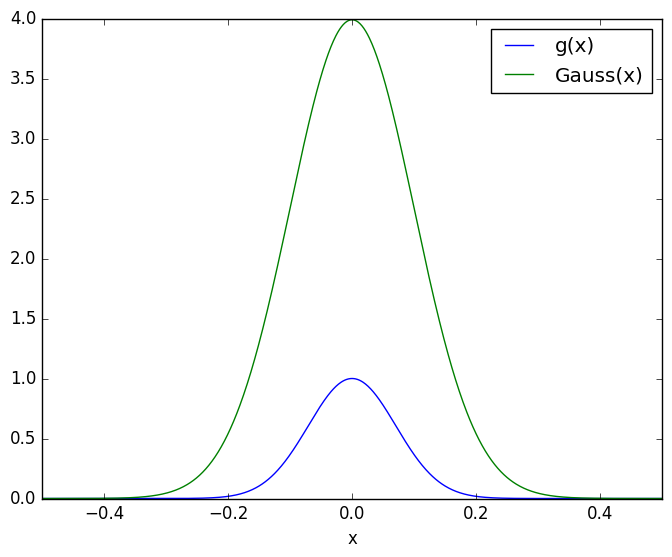

In [4]:
using PyPlot
# using Distributions

# initialize
N     = 1000
mu    = 0
sigma = .1
# rand(Normal(mu, sigma))

# points = rand(-20:20, N)
# I = integrate(g, 20, N=N, points=points)

xs = collect(-1:1e-3:1)
gauss(x, mu=mu, s=sigma) = 1/(s*sqrt(2pi)) .* exp(-0.5 .* (x.-mu).^2 ./s^2)

figure()
title("Funktion g")
plot(xs, g(xs), label="g(x)")
xlim(-0.5,0.5)
xlabel("x")
legend()

figure()
plot(xs, g(xs), label="g(x)")
plot(xs, gauss(xs), label="Gauss(x)")
xlabel("x")
xlim(-0.5,0.5)
legend()
;